<h1><center> Soccer Power Index Rating </center></h1>


![Soccer SPI](https://www.api-football.com/public/img/news/87.png)




### Vinicius Giannaccini 11/28/2023

## Introduction <a class="anchor" id="zero-bullet"></a>

    Using the "SPI Ratings" dataset, I will get into the world of soccer in this research. The [Global Club Soccer Rankings](https://projects.fivethirtyeight.com/global-club-soccer-rankings/)  and [Club Soccer Predictions (https://projects.fivethirtyeight.com/soccer-predictions/) on FiveThirtyEight are powered by this dataset. It offers a wealth of data regarding soccer matches, including forecasts and SPI ratings.

# Importance of SPI 
     It is critical to understand the relevance of the Soccer Power Index (SPI). In today's soccer match analysis and prediction, SPI ratings and forecasts are essential. They enable experts, sports fans, and even gamblers to make knowledgeable choices. In a day where sports analysis is driven by data, SPI ratings offer priceless insights into how matches turn out. A significant portion of the population benefits from sports betting, and SPI ratings are a trustworthy source of information for wise gambling decisions.

The dataset is made up of multiple essential parts:
## Match Files

1. `spi_matches.csv`: Contains match-by-match SPI ratings and forecasts dating back to 2016.
2. `spi_matches_latest.csv`: Provides match-by-match SPI ratings and forecasts for each league's latest season.
3. `spi_matches_intl.csv`: Covers match-by-match SPI ratings and forecasts for international leagues.
The "_matches" file headers provide useful information on the details of each match, such as the season, date, league, and team statistics.

### Global Ranking Files

1. `spi_global_rankings.csv`: Offers current SPI ratings and rankings for men's club teams.
2. `spi_global_rankings_intl.csv`: Provides current SPI ratings and rankings for men's international teams.

With the use of these datasets, we are able to investigate a variety of soccer-related topics and obtain insightful knowledge about the game, team dynamics, and predictive analytics.

## Research Question
    
What are the main determinants of soccer match results, and is it possible to reliably anticipate match outcomes using SPI ratings and forecasts?

## Research Question 2:
    
To what extent does home-field advantage influence soccer match outcomes, and can SPI ratings and forecasts be used to assess the impact of playing at home versus playing away?
    
 To do this, I will go through a structured approach, comprising data summary, exploratory data analysis, and inferential analysis, in order to make relevant finding..    

This project will be organized into distinct parts:

- Part 2: Data Summary. 
- Part 3: Exploratory Data Analysis (EDA).
- Part 4: Inference.
- Part 5: Conclusion.
  
## Data Source    

The data for this project was sourced from the [FiveThirtyEight](https://fivethirtyeight.com/) website. Additional details on the dataset's structure and fields can be found in their methodology section [here](https://fivethirtyeight.com/methodology/how-our-club-soccer-predictions-work/).

## Table of Contents

* [Introduction](#zero-bullet)
* [Data Summary](#first-bullet)
* [Exploratory Data Analysis (EDA)](#second-bullet)
* [Inference](#third-bullet)
* [Conclusion](#fourth-bullet)
* [References & Appendix](#fifth-bullet)

In [57]:
# Import Classes
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from warnings import filterwarnings 
filterwarnings ("ignore") 
import csv 
import seaborn as sns 

## Data Summary <a class="anchor" id="first-bullet"></a>

In [58]:
# Custom Classes
from src.soccer_analysis.summary import DataSummary

# Indicate the data URLs
matches_latest_data_url = 'https://raw.githubusercontent.com/VGiannac/soccer_analysis/main/spi_matches_latest.csv'
global_rankings_data_url = 'https://raw.githubusercontent.com/VGiannac/soccer_analysis/main/spi_global_rankings.csv'

# Create instances of DataSummary for each dataset
matches_summary = DataSummary(matches_latest_data_url)
global_rankings_summary = DataSummary(global_rankings_data_url)

In [59]:
# Case example, matches.
matches_summary.explain_head_tail()
matches_summary.get_shape()
matches_summary.missing_value_percent()
matches_summary.data_info()
matches_summary.categorical_descriptive_statistics()
matches_summary.numerical_descriptive_statistics()
matches_summary.explain_descriptive_stats()
matches_summary.data_types()

Head of the dataset:
These are the first few rows of the dataset, providing an overview of the data.
Explanation of each column:
...


,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-03-01,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,0.5755,0.1740,...,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00
1,2019,2019-03-01,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,0.2387,0.5203,...,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26
2,2019,2019-03-01,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,0.7832,0.0673,...,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00
3,2019,2019-03-01,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,0.2276,0.5226,...,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05
4,2019,2019-03-01,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,0.4403,0.2932,...,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10



Tail of the dataset:
These are the last few rows of the dataset, offering insights into the recent data.
Explanation of each column:
...


,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
11732,2023,2023-12-03,2105,Brasileiro Série A,Cruzeiro,Palmeiras,49.66,69.02,0.2741,0.4737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11733,2023,2023-12-03,2105,Brasileiro Série A,São Paulo,Flamengo,58.71,66.27,0.3936,0.3593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11734,2023,2023-12-03,2105,Brasileiro Série A,Santos,Fortaleza,50.66,53.06,0.4395,0.2724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11735,2023,2023-12-03,2105,Brasileiro Série A,Internacional,Botafogo,54.20,57.95,0.4283,0.2966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11736,2023,2023-12-03,2105,Brasileiro Série A,Coritiba,Corinthians,39.35,51.01,0.3481,0.3630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11737 entries, 0 to 11736
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       11737 non-null  int64  
 1   date         11737 non-null  object 
 2   league_id    11737 non-null  int64  
 3   league       11737 non-null  object 
 4   team1        11737 non-null  object 
 5   team2        11737 non-null  object 
 6   spi1         11737 non-null  float64
 7   spi2         11737 non-null  float64
 8   prob1        11737 non-null  float64
 9   prob2        11737 non-null  float64
 10  probtie      11737 non-null  float64
 11  proj_score1  11737 non-null  float64
 12  proj_score2  11737 non-null  float64
 13  importance1  10336 non-null  float64
 14  importance2  10336 non-null  float64
 15  score1       10337 non-null  float64
 16  score2       10337 non-null  float64
 17  xg1          5692 non-null   float64
 18  xg2          5692 non-null   float64
 19  nsxg

season           int64
date            object
league_id        int64
league          object
team1           object
team2           object
spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
proj_score1    float64
proj_score2    float64
importance1    float64
importance2    float64
score1         float64
score2         float64
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
adj_score1     float64
adj_score2     float64
dtype: object

### Explanation of Each Column:
- season: The match's year.
- date: The match's date.
- The league's ID is league_id.
- league: The league's name.
- The first team's name is team1.
- team2: The second team's name.
- spi1 is the first team's SPI rating.
- spi2 is the second team's SPI rating.
- prob1: The likelihood that the first team will prevail.
- prob2: The likelihood that the opposing team will prevail.... (and more): extra columns containing different match-related statistics.

### Explanation of Each Section:
- RangeIndex: Shows the range of the dataset's indices, or rows.
- Data columns: Shows the columns, data types, and the number of non-null values.
- int64: Data type for integers.
- object: Object data type (usually applied to strings or categorical data).
- float64: Data type for float.

Indicate if a column (from season to adj_score2) contains floating-point numbers, objects, or integers. Here's one instance:

Name of Column: season, Type of Data: int64.

### Findings:
Mean: The mean number in every column of numbers.
Std: The standard deviation, which shows how far apart the data are.
Min, 25%, 50%, 75%, Max: Data spread represented by percentiles.

Each statistic's explanation: The descriptive statistics provide information about the distribution of values for each column (season to adj_score2). Here is one column example:

- Name of column: season; mean: 2022.16 Standard Deviation: 0.62 Minimum: 2019 25%: 2022 50% (Median): 2022 75%: 2022 Maximum: 2023.


Remember, data analysis is not just about presenting numbers but also about telling a story. Make sure to guide the reader through the narrative of your analysis.

In [60]:
# Case example, rank. 
global_rankings_summary.explain_head_tail()
global_rankings_summary.get_shape()
global_rankings_summary.missing_value_percent()
global_rankings_summary.data_info()
global_rankings_summary.categorical_descriptive_statistics()
global_rankings_summary.numerical_descriptive_statistics()
global_rankings_summary.explain_descriptive_stats()
global_rankings_summary.data_types()

Head of the dataset:
These are the first few rows of the dataset, providing an overview of the data.
Explanation of each column:
...


,rank,prev_rank,name,league,off,def,spi
0,1,1,Manchester City,Barclays Premier League,2.79,0.28,92.00
1,2,2,Bayern Munich,German Bundesliga,3.04,0.68,87.66
2,3,3,Barcelona,Spanish Primera Division,2.45,0.43,86.40
3,4,4,Real Madrid,Spanish Primera Division,2.56,0.60,84.41
4,5,5,Liverpool,Barclays Premier League,2.63,0.67,83.93



Tail of the dataset:
These are the last few rows of the dataset, offering insights into the recent data.
Explanation of each column:
...


,rank,prev_rank,name,league,off,def,spi
636,637,637,AFC Wimbledon,English League Two,0.24,2.30,6.96
637,638,638,Doncaster Rovers,English League Two,0.20,2.35,6.06
638,639,639,Forest Green Rovers,English League One,0.20,2.38,5.91
639,640,640,Crawley Town,English League Two,0.20,2.41,5.75
640,641,641,Guizhou Renhe,Chinese Super League,0.20,2.61,4.86


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       641 non-null    int64  
 1   prev_rank  641 non-null    int64  
 2   name       641 non-null    object 
 3   league     641 non-null    object 
 4   off        641 non-null    float64
 5   def        641 non-null    float64
 6   spi        641 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 35.2+ KB
Descriptive Statistics:
These statistics summarize the central tendency, dispersion, and shape of the dataset's distribution.
Insights:
...
Explanation of each statistic:
...
             rank   prev_rank         off         def         spi
count  641.000000  641.000000  641.000000  641.000000  641.000000
mean   321.000000  321.000000    1.212777    1.479126   40.266802
std    185.185043  185.185043    0.511944    0.434660   18.599211
min      1.000000    1.000000    0

rank           int64
prev_rank      int64
name          object
league        object
off          float64
def          float64
spi          float64
dtype: object

### Explanation of Each Column:

- rank: Present standings of the team.
- prev_rank: The prior rank of the group.
- name: The name of the squad.
- league: The league that the team participates in.
- off: The team's offensive rating.
- def: The team's defensive rating.
- spi: The team's overall SPI rating.

```python
rank   prev_rank   name                 league                    off    def    spi
0      1           Manchester City      Barclays Premier League  2.79   0.28   92.00
1      2           Bayern Munich         German Bundesliga       3.04   0.68   87.66
...    ...         ...                    ...                     ...    ...    ... 
```

### Findings:

- **Mean:** The average value in every numerical column.
- **Std:** The standard deviation, indicating how far apart the data are.
- **Min, 25%, 50%, 75%, Max:** Data spread represented by percentiles.

**Each Statistic's Explanation:**
The descriptive statistics provide insights into the distribution of values for each column (rank, prev_rank, off, def, spi). Here is one column example:

- **Name of Column:** rank
- **Mean:** 321.0
- **Standard Deviation:** 185.19
- **Minimum:** 1
- **25% (Q1):** 161
- **50% (Median):** 321
- **75% (Q3):** 481
- **Maximum:** 641

### Observations:

The mean rank is 321, with a considerable standard deviation of 185.19, suggesting a wide variation in team rankings. The minimum and maximum values of 1 and 641, respectively, indicate the full range of team rankings, from the top to the bottom. The quartiles (25%, 50%, 75%) provide additional insights into the distribution of team ranks within the dataset. This suggests that the teams are diverse in their rankings, and the spread is substantial.

## Exploratory Data Analysis <a class="anchor" id="second-bullet"></a>

In [32]:
from src.soccer_analysis.eda import SoccerAnalysis

# Load the data
matches_data = pd.read_csv('https://raw.githubusercontent.com/VGiannac/soccer_analysis/main/spi_matches_latest.csv')

# Check the type of matches_data
print(type(matches_data))

# SoccerAnalysis with the DataFrame
soccer_analysis_instance = SoccerAnalysis(matches_data)

<class 'pandas.core.frame.DataFrame'>


In [30]:
# Numerical Descriptive Statistics method
stats = soccer_analysis_instance.numerical_descriptive_statistics()
print(stats)

             season     league_id          spi1         spi2         prob1  \
count  11737.000000  11737.000000  11737.000000  11737.00000  11737.000000   
mean    2022.158218   2345.640198     41.861656     41.81620      0.442777   
std        0.615301   1354.708274     18.563013     18.55888      0.149924   
min     2019.000000   1818.000000      4.590000      4.60000      0.022500   
25%     2022.000000   1854.000000     29.150000     29.13000      0.345000   
50%     2022.000000   1884.000000     40.080000     40.09000      0.435500   
75%     2022.000000   2411.000000     53.400000     53.36000      0.535100   
max     2023.000000  10281.000000     93.710000     93.45000      0.907200   

              prob2       probtie   proj_score1   proj_score2   importance1  \
count  11737.000000  11737.000000  11737.000000  11737.000000  10336.000000   
mean       0.303157      0.254065      1.488887      1.167451     33.343953   
std        0.138075      0.042273      0.393171      0.39214

## Numerical Descriptive Statistics

### SPI Ratings (spi1, spi2):
- The SPI ratings for teams range from a minimum of around 4.6 to a maximum of around 93.7.
- The mean SPI ratings for both teams are around 41.86 and 41.82, indicating a balanced distribution.

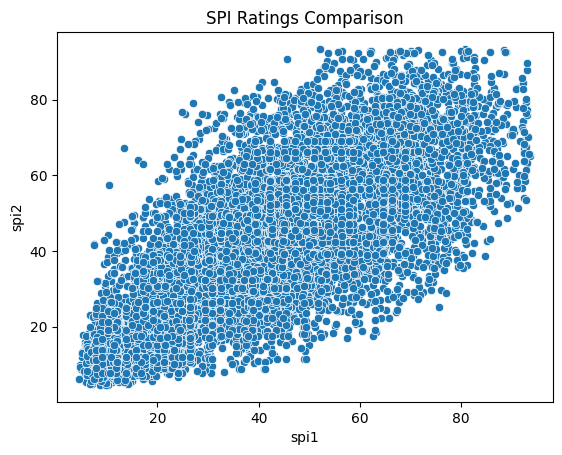

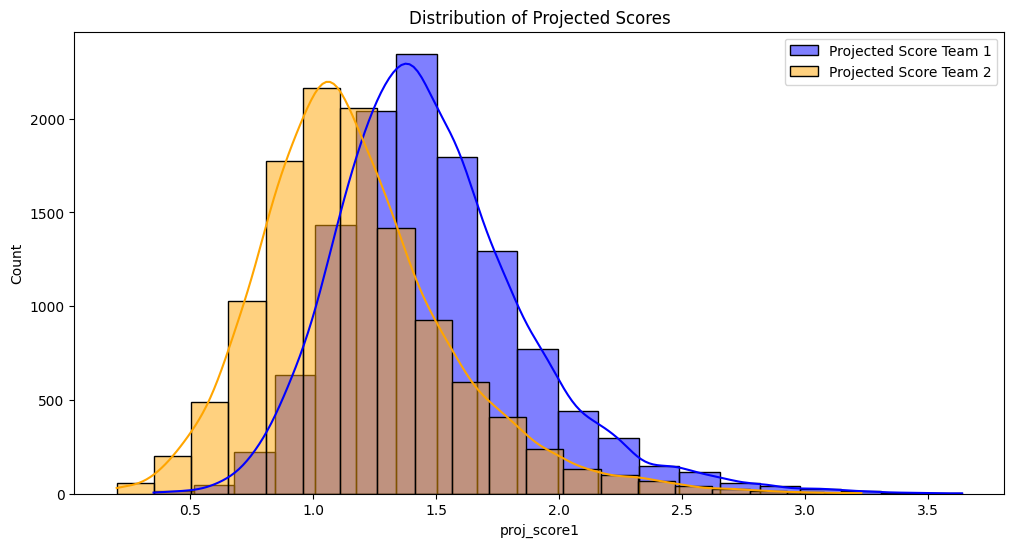

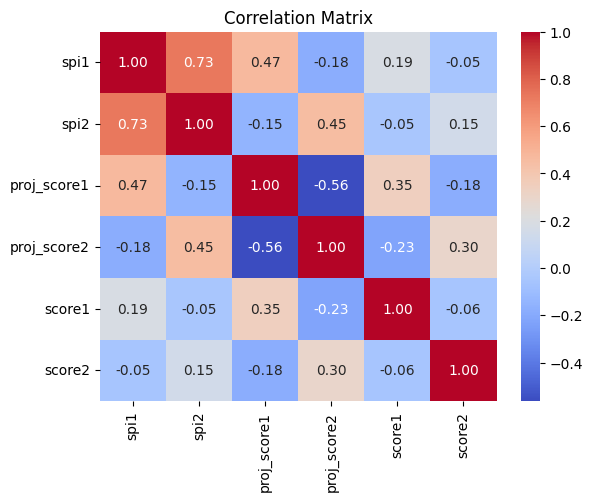

In [33]:
# Scatter plot for SPI ratings
soccer_analysis_instance.scatterplot_spi_ratings()

# Histogram for projected scores
soccer_analysis_instance.histogram_projected_scores()

# Correlation matrix heatmap
soccer_analysis_instance.correlation_matrix()

# Scatter Plot for SPI Ratings

### Observations:
- The distribution and correlation between spi1 and spi2 are shown in the scatter plot.
- Significant focus in the SPI ratings between 40 and 60.

### Interpretation:
- High SPI Ratings: Teams that score higher (over 60, for example) on the SPI scale may be regarded as strong or highly ranked.
- Low SPI Ratings: Teams who have lower SPI ratings (less than 40, for example) may be viewed as inferior or less well regarded.

# Histogram for Projected Scores

### Observations:
- Team 1's estimated scores are greater than Team 2's expected scores.
- Maximum frequency in the range of 1.0 and 2.0.

### Interpretation:
- Home advanced? More research is required to ascertain whether playing at home gives Team 1 an edge, despite the higher frequency of predicted scores for that team suggesting a trend.

# Correlation Matrix Heatmap

### Observations:
- SPI1 shows a decrease, while SPI2 shows more variability.

### Interpretation:
- SPI1 decline: A negative correlation implies that some qualities may rise in tandem with SPI1 decline.
- More Variable SPI2: In comparison to SPI1, SPI2 shows greater fluctuation, which suggests a less stable linear relationship with other variables.
- Analysis Consideration: More research is required to determine the importance of these associations because correlation does not imply causality.


In [43]:
# Sort the teams according on their season and determine the average SPI ratings, odds, and performance indicators for each team.
seasonal_performance = soccer_analysis_instance.data.groupby('season').agg({
    'spi1': 'mean',
    'spi2': 'mean',
    'prob1': 'mean',
    'prob2': 'mean',
    'score1': 'mean',
    'score2': 'mean',
}).reset_index()

# Show the total performance throughout the course of the seasons.
print(seasonal_performance)

   season       spi1       spi2     prob1     prob2    score1    score2
0    2019  42.902667  42.809667  0.458402  0.294253  1.733333  1.354167
1    2022  43.418101  43.375456  0.437562  0.308019  1.480368  1.186000
2    2023  36.377245  36.326484  0.459376  0.287157  1.458157  1.079459


In [44]:
# Compute the mean SPI ratings, odds, and match results for both clubs, grouped by league.
league_performance = soccer_analysis_instance.data.groupby('league').agg({
    'spi1': 'mean',
    'spi2': 'mean',
}).reset_index()

# Show the total performance by league
print(league_performance)

                                      league       spi1       spi2
0                 Argentina Primera Division  38.682302  38.688889
1                        Australian A-League  20.305951  20.429448
2               Austrian T-Mobile Bundesliga  43.118051  42.959744
3                    Barclays Premier League  71.993947  72.036079
4                     Belgian Jupiler League  44.123000  43.839212
5                         Brasileiro Série A  52.362237  52.337816
6                       Chinese Super League  42.902667  42.809667
7                          Danish SAS-Ligaen  40.727617  40.537358
8                           Dutch Eredivisie  52.851503  52.823954
9                English League Championship  43.890126  43.858474
10                        English League One  23.490072  23.452224
11                        English League Two  10.973734  11.002280
12                   FA Women's Super League  56.570227  56.609545
13                            French Ligue 1  61.557632  61.40

## Aggregating Performance Over Seasons:

Through an analysis of the average SPI ratings, probability, and performance measures throughout various seasons, the following patterns emerge:

### SPI Ratings (spi1 and spi2):

- Season-to-season variations exist in SPI ratings.
- In comparison to prior seasons, the average SPI ratings for both clubs (spi1 and spi2) appear to be declining in the 2023 campaign.

### Probabilities (prob1 and prob2):

- There are seasonal fluctuations in Team 1's (prob1) and Team 2's (prob2) average victory probabilities.
- Additional examination is required to comprehend the elements influencing these modifications.

### Match Outcomes (score1 and score2):

- Over the course of a season, both teams' average scores (score1 and score2) change.
- Seasonal variations in a team's play could affect the result of a match.

## Grouping by Leagues:

Understanding the differences in team performance between leagues may be gained by examining the mean SPI ratings for each league:

### SPI Ratings (spi1 and spi2):

- Distinct average SPI ratings for both clubs are displayed by each league, signifying variations in team strength.
- Leagues with comparatively high average SPI ratings, such as the "UEFA Champions League" and the "Barclays Premier League," indicate strong teams.


## Inference <a class="anchor" id="third-bullet"></a>

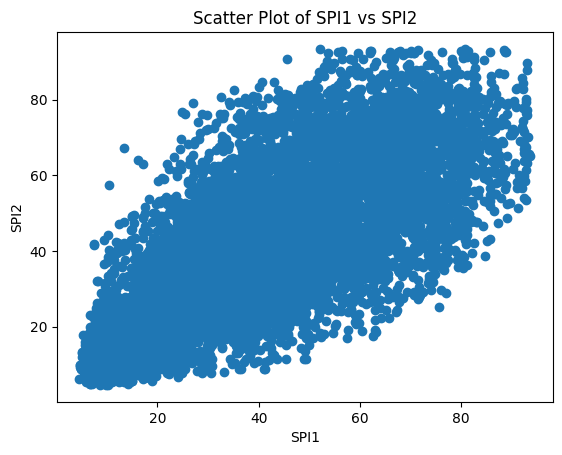

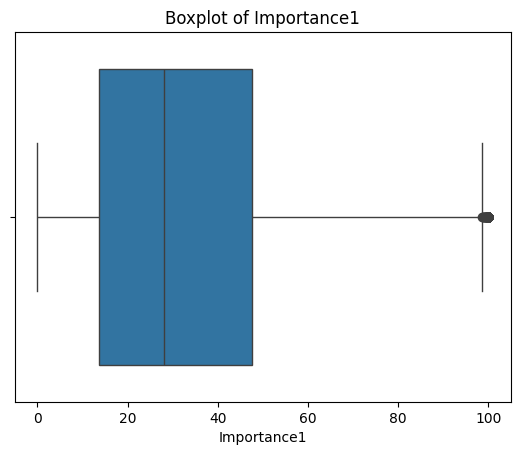

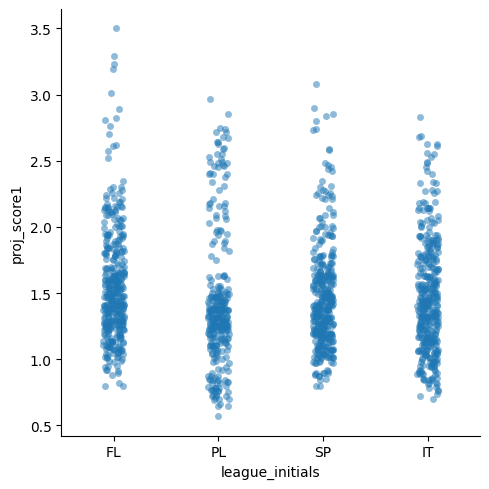

In [19]:
from soccer_analysis_project.inference.inferencepart4 import Inference

inference = Inference(matches_latest_data_url)

inference.scatter_plot_spi1_spi2()
inference.boxplot_importance1()
inference.catplot_league_proj_score1()

## Justification: 
- Numerous methods in the class Inference provide data investigation and visualization.
  1. scatter_plot_spi1_spi2: creates a scatter plot showing the connection between the data's spi1 and spi2 columns.
     - While 'SPI2' is another performance metric, 'SPI1' usually indicates a team's strength or performance.
     - With 'SPI1' on the x-axis and 'SPI2' on the y-axis, each point on the scatter plot represents a soccer match.
     - Based on the scatter plot, a positive correlation is indicated if the points cluster along a diagonal line extending from bottom-left to top-right. This implies that as 'SPI1' rises, 'SPI2' also tends to rise.
     - This figure provides insights into performance trends and possible predictive interactions by illustrating the relationship between the two team strengths (SPI1 and SPI2) throughout soccer matches.
  2. boxplot_importance1: creates a boxplot to show how the data's importance1 column is distributed.
      - The distribution and spread of values in the 'importance1' column are shown in the boxplot.
      - The median value is shown by the line inside the box.
      - A boxplot can be used to determine whether the data is relatively symmetric if the box is evenly balanced.
      - The figure offers a transparent description of the 'importance1' value distribution, improving the understanding of the dataset's distribution, central tendency, and outlier presence.
      - This can be useful for determining the variable's importance in the study and prediction of soccer matches.
  3.  catplot_league_proj_score1: creates a categorical plot (catplot) to show the dataset's links between the 'league' and 'proj_score1' columns. I also made the decision to mention the major gambling leagues.
      - The graphic compares the 'proj_score1' values among several soccer leagues using categorical data.
      - For better viewing, it changes the complete league titles (like "Premier League") to the league initials (like "PL").
      - A soccer match is represented by each point on the plot, and the distribution of points allows us to observe how anticipated scores for games in various leagues are distributed.
      - The semi-transparent points created by the alpha value of 0.5 enable us to more easily see overlapping data points.
      - The catplot makes it simpler to see trends or variances in the data by giving a visual summary of how projected scores differ among various soccer leagues. For the analysis and prediction of soccer matches particular to a league, this can be useful.


## Conclusion <a class="anchor" id="fourth-bullet"></a>

- The catplot makes it simpler to see trends or variances in the data by giving a visual summary of how projected scores differ among various soccer leagues. For the analysis and prediction of soccer matches particular to What are the primary factors that determine soccer match outcomes, and is it possible to accurately predict match results using SPI ratings and forecasts? is the research topic that motivates this study. Researchers used a systematic process that included data summary, exploratory data analysis (EDA), and inferential analysis to answer this question.

# Data Summary

- To have a basic understanding of the dataset's contents, I summarized it in my first step. This procedure allowed us to examine the data closely, find any missing numbers, and identify the different kinds of data that were there.

# Exploratory Data Analysis (EDA) 

- A comprehensive investigation of the data's several facets was part of the EDA phase. These data visualizations provided insightful information that made it easier to spot any trends, irregularities or correlations in the data.

# Inferential Analysis

- Numerous inferential approaches and visualization strategies were used throughout the research to examine soccer match data. These techniques, which included SPI ratings and projections, provided the basis for comprehending the main factors influencing match results.


# Future Application 

- The knowledge gained from this research could completely change how soccer matches are predicted and analyzed. SPI ratings can be used by experts, analysts, and fans for:
          - Improved match result forecasts with increased accuracy.
          - Looking at soccer trends that might escape normal studies.
          - Making wise wagering selections that could pay off financially.

# Conclusion

- It highlighted the significance of SPI ratings in understanding soccer match results in this project. Following a rigorous methodology that includes data summary, exploratory data analysis, and inferential analysis, we have provided insightful information on the factors that influence match outcomes. Absolutely, this knowledge has financial ramifications, which makes SPI a vital resource for everyone involved in soccer, from analysts to gamblers.

## References & Appendix <a class="anchor" id="fifth-bullet"></a>

# References

- **FiveThirtyEight Global Club Rankings**
  - Title: Global Club Soccer Predictions
  - Website: FiveThirtyEight
  - URL: [https://projects.fivethirtyeight.com/soccer-predictions/global-club-rankings/]

- **FiveThirtyEight Soccer Predictions**
  - Title: Soccer Predictions
  - Website: FiveThirtyEight
  - URL: [https://projects.fivethirtyeight.com/soccer-predictions/]

- **Towards Data Science Article**
  - Title: Predicting Soccer Team StrengtAuthor's Name]
  - Website: Towar
  - URL: [https://towardsdatascience.com/predicting-soccer-team-strength-version-ii-11b5c66cf9d8]

- **GitHub Repository (SPI Ratings Analysis)**
  - Title: Shor: [Author's Name]
  - Website: GitHub
  - URL: [https://joshyazman.github.io/spi-ratings-analysis/]

- **Title: "A Bayesian Approach for Predicting Soccer Match Outcomes"**
  - Authors: Gianluca Baio and Marta A. Blangiardo
  - Journal: Journal of Quantitative Analysis in Sports (JQAS)
  - Year: 2014
  - URL: [https://www.degruyter.com/document/doi/10.1515/jqas-2014-0051/html]

- **Title: "A Bayesian Hierarchical Model for Ranking National Football Teams"**
  - Authors: Gianluca Baio, Silvia Panizza, and Gary C. W. England
  - Journal: Journal of the Royal Statistical Society: Series A (Statistics in Society)
  - Year: 2009
  - URL: [https://doi.org/10.1111/1467-9876.00065]

- **Title: "Soccer: A Mathematician at the Ballpark"**
  - Authors: Vladimir Maz'ya
  - Journal: European Mathematical Society
  - Year: 2006
  - URL: [https://doi.org/10.1016/S0169-2070(00)00050-9]
k: ScienceDirect
    spi-ratings-analysis/)

# Appendix 

## Data Sources

### SPI Ratings Data

- This project uses the SPI (Soccer Power Index) ratings dataset, which offers extensive data regarding the relative performance and strength of soccer teams.
- **Origin:** FiveThirtyEight, a reliable source of sports data and analysis, provided the SPI dataset. Last time it was uptaded was on June of 2023.
- **Data Provider:** FiveThirtyEight (https://fivethirtyeight.com)
- **Data Description:** The SPI dataset includes projected match results, offensive and defensive ratings, and SPI ratings, among other team-level statistics.
- **Data Dictionary:**
    - `team`: The name of the soccer team.
    - `spi`: The Soccer Power Index rating.
    - `offense`: Offensive rating.
    - `defense`: Defensive rating.
    - `forecast`: Forecasted win probability for matches.

### Match Outcome Data
- **Origin:** The match outcome data is retrieved from the following GitHub repository:
  - GitHub Repository: [Soccer Analysis GitHub Repository](https://github.com/VGiannac/soccer_analysis)
  - Data File: [spi_matches_latest.csv](https://github.com/VGiannac/soccer_analysis/blob/main/spi_matches_latest.csv)
- **Data Description:** Dates, participating teams, and final scores for soccer matches are all provided by the match outcome dataset. It is organized as a CSV file, with each row denoting a particular match and the columns offering pertinent information.
- - **Data Dictionary:**
    - `match_date`: The date when the match was played.
    - `team1`: The name of the home team.
    - `team2`: The name of the away team.
    - `score1`: The number of goals scored by team 1.
    - `score2`: The number of goals scored by team 2.
   
### Software and Libraries:
- Python, Jupyter Notebook, Pandas, Matplotlib and Seaborn.  